In [3]:
from zipfile import ZipFile
file_name="signal.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [534]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [535]:
IMG_SIZE=50
dataset='traffic'
categories=['GuideSign','M1','M4','M5','M6','M7','P1','P10_50','P12','W1']
           
      

In [536]:
# Categories_Data
training_data=[]

for c in categories:
    path=os.path.join(dataset,c)
    class_num=categories.index(c)
    for img in os.listdir(path):
  
            img_arrary=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_arrary,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])



In [537]:
import random
random.shuffle(training_data)

In [538]:
for sample in training_data[:5]:
    print(sample[1])
print(new_array)

1
5
3
5
2
[[[136 130 123]
  [138 131 122]
  [141 133 120]
  ...
  [126 117 104]
  [132 123 109]
  [133 125 108]]

 [[132 131 123]
  [134 132 122]
  [137 134 120]
  ...
  [113 105  92]
  [121 114  99]
  [125 118 101]]

 [[125 130 121]
  [128 132 121]
  [131 133 118]
  ...
  [ 94  88  75]
  [104  99  84]
  [113 109  91]]

 ...

 [[ 55 103 105]
  [ 32  83  85]
  [  9  63  64]
  ...
  [ 16  62  69]
  [ 31  66  67]
  [ 52  71  59]]

 [[ 48  97  99]
  [ 28  79  81]
  [ 10  64  65]
  ...
  [ 26  70  75]
  [ 37  70  69]
  [ 52  70  57]]

 [[ 41  89  91]
  [ 25  76  78]
  [ 10  64  65]
  ...
  [ 34  76  79]
  [ 41  72  69]
  [ 52  69  54]]]


In [539]:
from sklearn.model_selection import train_test_split
X=[]
y=[]

6348
6348


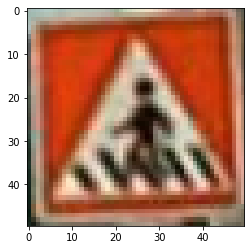

In [540]:
for feature ,label in training_data: 
    X.append(feature)
    y.append(label)
plt.imshow(X[1])
Q=X[0]/255
Q
print(len(y))
print(len(X))

In [541]:
X=np.array(X)
y=np.array(y)


Text(0.5, 1.0, 'Number of digit classes')

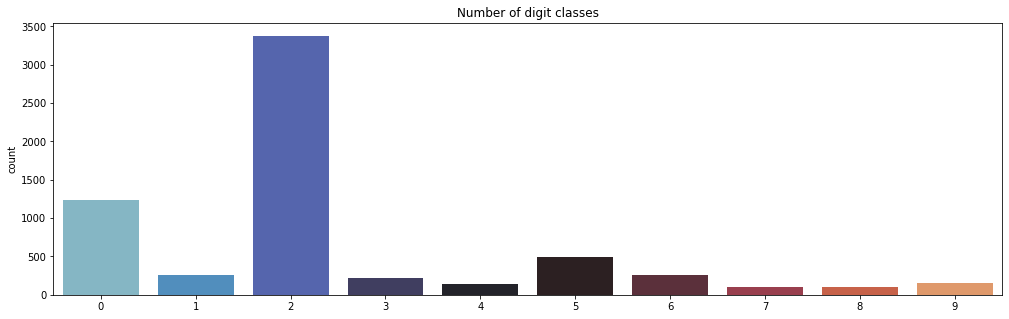

In [542]:

plt.figure(figsize=(17,5))
g = sns.countplot(y, palette="icefire")
plt.title("Number of digit classes")

In [543]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=2)
X_Train,X_val,y_Train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2)

In [544]:
print(len(X_Train))
print(len(X_val))
print(len(X_test))

4062
1016
1270


In [545]:
X_Train.shape
y_Train[:5]
X_Train.shape

(4062, 50, 50, 3)

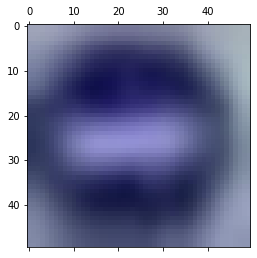

In [546]:
plt.matshow(X_Train[0])

In [547]:
#Normalization

X_Train = X_Train / 255.0
X_test = X_test / 255.0


In [548]:
#CNN

from tensorflow.keras import layers, models,optimizers
from tensorflow.keras.models import Sequential
cnn = Sequential([
    layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation='relu', input_shape=(50, 50,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

  
  

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
    
])
cnn.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_152 (Conv2D)         (None, 50, 50, 8)         224       
                                                                 
 max_pooling2d_152 (MaxPooli  (None, 25, 25, 8)        0         
 ng2D)                                                           
                                                                 
 dropout_207 (Dropout)       (None, 25, 25, 8)         0         
                                                                 
 conv2d_153 (Conv2D)         (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 12, 12, 16)       0         
 ng2D)                                                           
                                                                 
 dropout_208 (Dropout)       (None, 12, 12, 16)      

In [549]:

import time

"""
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        """
#time_callback1 = TimeHistory()
tcnn=time.time()


In [550]:
adm=optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=adm,
          loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [551]:
history1=cnn.fit(X_Train,y_Train,validation_data = (X_val,y_val),verbose='auto',epochs=35,batch_size=32)

Epoch 1/35
127/127 [==============================] - 10s 78ms/step - loss: 1.0959 - accuracy: 0.6657 - val_loss: 45.0759 - val_accuracy: 0.8209
Epoch 2/35
127/127 [==============================] - 5s 43ms/step - loss: 0.5603 - accuracy: 0.8301 - val_loss: 53.1840 - val_accuracy: 0.8406
Epoch 3/35
127/127 [==============================] - 5s 42ms/step - loss: 0.4480 - accuracy: 0.8646 - val_loss: 39.7817 - val_accuracy: 0.8760
Epoch 4/35
127/127 [==============================] - 5s 43ms/step - loss: 0.3785 - accuracy: 0.8808 - val_loss: 31.1736 - val_accuracy: 0.8829
Epoch 5/35
127/127 [==============================] - 8s 62ms/step - loss: 0.3106 - accuracy: 0.9057 - val_loss: 30.1217 - val_accuracy: 0.9085
Epoch 6/35
127/127 [==============================] - 5s 42ms/step - loss: 0.2701 - accuracy: 0.9183 - val_loss: 28.9546 - val_accuracy: 0.9026
Epoch 7/35
127/127 [==============================] - 5s 42ms/step - loss: 0.2251 - accuracy: 0.9338 - val_loss: 31.7906 - val_accuracy

In [552]:
from numpy.lib.function_base import average
time1=(time.time()-tcnn)
print(time1)

201.97470712661743


In [553]:
#Evaluate Training_Date

trainD1=cnn.evaluate(X_Train,y_Train)
trainD1

127/127 [==============================] - 2s 16ms/step - loss: 0.0210 - accuracy: 0.9938


[0.021014634519815445, 0.9938454031944275]

In [554]:
train_acc1=trainD1[1]

In [555]:
#Evaluate Testing_Date

testD1=cnn.evaluate(X_test,y_test)
testD1

40/40 [==============================] - 1s 16ms/step - loss: 0.2742 - accuracy: 0.9543


[0.2742493748664856, 0.9543306827545166]

In [556]:
test_acc1=testD1[1]

In [557]:
#Evaluate Validation_Date

cnn.evaluate(X_val,y_val)

32/32 [==============================] - 1s 16ms/step - loss: 114.4846 - accuracy: 0.8337


[114.48458862304688, 0.8336614370346069]

In [558]:
#Dilated_CNN Model

di = Sequential([
    layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation='relu',dilation_rate=2, input_shape=(50, 50,3)),
    layers.MaxPooling2D((2, 2)),
     layers.Dropout(0.25),
     layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
     layers.Dropout(0.25),
    


   layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
    
])
di.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 50, 50, 8)         224       
                                                                 
 max_pooling2d_154 (MaxPooli  (None, 25, 25, 8)        0         
 ng2D)                                                           
                                                                 
 dropout_210 (Dropout)       (None, 25, 25, 8)         0         
                                                                 
 conv2d_155 (Conv2D)         (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_155 (MaxPooli  (None, 12, 12, 16)       0         
 ng2D)                                                           
                                                                 
 dropout_211 (Dropout)       (None, 12, 12, 16)      

In [559]:
#time_callback2 = TimeHistory()
tdi=time.time()

In [560]:
adm=optimizers.Adam(learning_rate=0.001)
di.compile(optimizer=adm,
          loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [561]:
history2=di.fit(X_Train,y_Train,validation_data = (X_val,y_val),verbose='auto',epochs=35,batch_size=32)

Epoch 1/35
127/127 [==============================] - 6s 46ms/step - loss: 1.0344 - accuracy: 0.6709 - val_loss: 45.6834 - val_accuracy: 0.8278
Epoch 2/35
127/127 [==============================] - 6s 45ms/step - loss: 0.5750 - accuracy: 0.8257 - val_loss: 32.7602 - val_accuracy: 0.8642
Epoch 3/35
127/127 [==============================] - 6s 45ms/step - loss: 0.4491 - accuracy: 0.8644 - val_loss: 38.8006 - val_accuracy: 0.8770
Epoch 4/35
127/127 [==============================] - 6s 45ms/step - loss: 0.3860 - accuracy: 0.8808 - val_loss: 34.7047 - val_accuracy: 0.8632
Epoch 5/35
127/127 [==============================] - 6s 44ms/step - loss: 0.3305 - accuracy: 0.9015 - val_loss: 27.1021 - val_accuracy: 0.9055
Epoch 6/35
127/127 [==============================] - 6s 44ms/step - loss: 0.2767 - accuracy: 0.9121 - val_loss: 36.7304 - val_accuracy: 0.8868
Epoch 7/35
127/127 [==============================] - 6s 44ms/step - loss: 0.2322 - accuracy: 0.9291 - val_loss: 30.4611 - val_accuracy:

In [562]:
time2=(time.time()-tdi)
print(time2)

206.64966583251953


In [563]:
#Evaluate Training_Date

trainD2=di.evaluate(X_Train,y_Train)
trainD2

127/127 [==============================] - 2s 17ms/step - loss: 0.0122 - accuracy: 0.9966


[0.012183218263089657, 0.9965534210205078]

In [564]:
train_acc2=trainD2[1]

In [565]:
#Evaluate Testing_Date

testD2=di.evaluate(X_test,y_test)

40/40 [==============================] - 1s 17ms/step - loss: 0.2588 - accuracy: 0.9488


In [566]:
test_acc2=testD2[1]

In [567]:
#Evaluate Validation_Date

di.evaluate(X_val,y_val)

32/32 [==============================] - 1s 16ms/step - loss: 34.1548 - accuracy: 0.9400


[34.154815673828125, 0.9399606585502625]

In [495]:
#HDC Model
from sklearn.neural_network import MLPClassifier

hdc = Sequential([
    layers.Conv2D(filters=8, kernel_size=(3, 3),padding='same',activation='relu',dilation_rate=2, input_shape=(50,50,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(filters=16, kernel_size=(3, 3),padding='same',activation='relu',dilation_rate=3),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

 


   layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
    
])
hdc.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 50, 50, 8)         224       
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 25, 25, 8)        0         
 ng2D)                                                           
                                                                 
 dropout_195 (Dropout)       (None, 25, 25, 8)         0         
                                                                 
 conv2d_145 (Conv2D)         (None, 25, 25, 16)        1168      
                                                                 
 max_pooling2d_145 (MaxPooli  (None, 12, 12, 16)       0         
 ng2D)                                                           
                                                                 
 dropout_196 (Dropout)       (None, 12, 12, 16)      

In [496]:
#time_callback3 = TimeHistory()
thdc=time.time()

In [497]:
adm=optimizers.Adam(learning_rate=0.001)
hdc.compile(optimizer=adm,
          loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
     

In [498]:
history3=hdc.fit(X_Train,y_Train,validation_data = (X_val,y_val),verbose='auto',epochs=35,batch_size=32)

Epoch 1/35
127/127 [==============================] - 7s 48ms/step - loss: 1.0489 - accuracy: 0.6733 - val_loss: 37.2115 - val_accuracy: 0.7766
Epoch 2/35
127/127 [==============================] - 6s 48ms/step - loss: 0.5681 - accuracy: 0.8203 - val_loss: 28.1798 - val_accuracy: 0.8514
Epoch 3/35
127/127 [==============================] - 6s 47ms/step - loss: 0.4370 - accuracy: 0.8708 - val_loss: 22.9622 - val_accuracy: 0.8898
Epoch 4/35
127/127 [==============================] - 6s 47ms/step - loss: 0.3759 - accuracy: 0.8880 - val_loss: 70.6662 - val_accuracy: 0.7421
Epoch 5/35
127/127 [==============================] - 6s 48ms/step - loss: 0.3232 - accuracy: 0.9028 - val_loss: 34.8482 - val_accuracy: 0.8287
Epoch 6/35
127/127 [==============================] - 6s 47ms/step - loss: 0.2700 - accuracy: 0.9195 - val_loss: 29.7350 - val_accuracy: 0.8839
Epoch 7/35
127/127 [==============================] - 6s 47ms/step - loss: 0.2351 - accuracy: 0.9286 - val_loss: 30.3363 - val_accuracy:

In [499]:
time3=(time.time()-thdc)
print(time3)

349.05693340301514


In [500]:
#Evaluate Training_Date

trainD3=hdc.evaluate(X_Train,y_Train)
trainD3

127/127 [==============================] - 4s 30ms/step - loss: 0.0163 - accuracy: 0.9963


[0.016346564516425133, 0.9963072538375854]

In [501]:
train_acc3=trainD3[1]

In [502]:
#Evaluate Testing_Date

testD3=hdc.evaluate(X_test,y_test)
testD3

40/40 [==============================] - 1s 36ms/step - loss: 0.1352 - accuracy: 0.9717


[0.1351684182882309, 0.9716535210609436]

In [503]:
test_acc3=testD3[1]

In [504]:
#Evaluate Validation_Date

hdc.evaluate(X_val,y_val)

32/32 [==============================] - 1s 17ms/step - loss: 44.7980 - accuracy: 0.9075


[44.7979621887207, 0.9074802994728088]

CNN_Predict

In [568]:
#Predict data cnn

y_pred_cnn = cnn.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_pred_classes_cnn[:5]

[2, 0, 0, 2, 0]

In [569]:
predictions_cnn=cnn.predict(X_test)
predictions_cnn

array([[ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       ...,
       [ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0],
       [ 0.7,  0.1,  0.1, ...,  0.0,  0.0,  0.0],
       [ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0]], dtype=float32)

In [570]:
y_predicted_labels_cnn = [np.argmax(i) for i in y_pred_cnn]

In [571]:
score=tf.nn.softmax(predictions_cnn[0])
score
np.argmax(score)

2

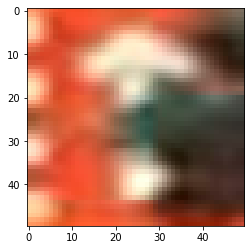

In [572]:
plt.imshow(X_test[0])

CNN_ConfutionMatrix


In [573]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_cnn)
print(cm)
accuracy_score(y_test, y_predicted_labels_cnn)

tf.Tensor(
[[234   0   7   1   0   2   0   0   0   0]
 [  0  43   9   0   0   2   0   0   0   0]
 [ 12   4 648   0   1   3   0   0   0   0]
 [  0   0   3  38   1   0   0   0   0   0]
 [  4   0   0   2  24   0   0   0   0   0]
 [  1   2   0   0   0  95   0   0   0   0]
 [  1   0   1   0   0   0  65   0   0   0]
 [  0   0   0   0   0   0   0  24   0   0]
 [  1   0   1   0   0   0   0   0  16   0]
 [  0   0   0   0   0   0   0   0   0  25]], shape=(10, 10), dtype=int32)


0.9543307086614173

CNN_ROC

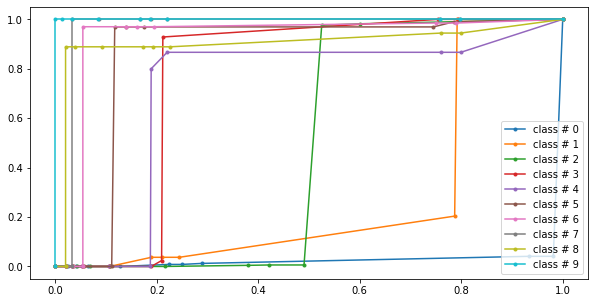

In [574]:
#ROC Model

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from collections import Counter

y_pred1 = cnn.predict(X_test)
y_pred1=[np.argmax(i) for i in y_pred1]

plt.figure(figsize=(10,5))


for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")

DCNN_Predict


In [575]:
y_pred_dcnn = di.predict(X_test)
y_pred_classes_dcnn = [np.argmax(element) for element in y_pred_dcnn]
y_pred_classes_dcnn[:5]

[2, 0, 0, 2, 0]

In [576]:
predictions_dcnn=di.predict(X_test)
predictions_dcnn

array([[ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       ...,
       [ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0],
       [ 0.9,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       [ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0]], dtype=float32)

In [577]:
y_predicted_labels_dcnn = [np.argmax(i) for i in y_pred_dcnn]

In [578]:
score=tf.nn.softmax(predictions_dcnn[0])
score
np.argmax(score)

2

DCNN_ConfutionMatrix

In [579]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_dcnn)
print(cm)
accuracy_score(y_test, y_predicted_labels_dcnn)

tf.Tensor(
[[232   1   8   2   0   1   0   0   0   0]
 [  1  41   9   1   0   2   0   0   0   0]
 [ 13   4 647   3   1   0   0   0   0   0]
 [  0   0   3  38   1   0   0   0   0   0]
 [  1   0   2   2  23   0   2   0   0   0]
 [  1   1   2   0   1  93   0   0   0   0]
 [  0   0   0   1   0   0  65   0   1   0]
 [  0   0   0   0   0   0   0  24   0   0]
 [  0   0   0   0   0   0   0   0  18   0]
 [  1   0   0   0   0   0   0   0   0  24]], shape=(10, 10), dtype=int32)


0.9488188976377953

DCNN_ROC


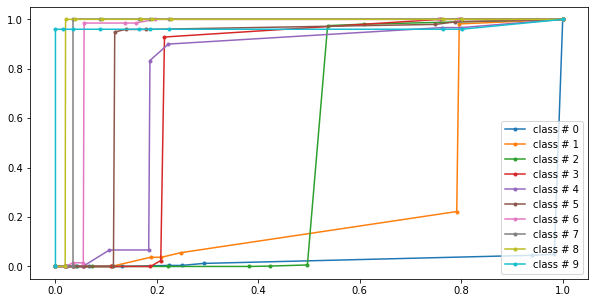

In [580]:
#ROC Model

y_pred1 = di.predict(X_test)
y_pred1=[np.argmax(i) for i in y_pred1]

plt.figure(figsize=(10,5))


for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")

# HDC_Predict


In [581]:
y_pred_hdc = hdc.predict(X_test)
y_pred_classes_hdc = [np.argmax(element) for element in y_pred_hdc]
y_pred_classes_hdc[:5]

[2, 0, 0, 2, 0]

In [582]:
predictions_hdc=hdc.predict(X_test)
predictions_hdc

array([[ 0.0,  0.0,  0.9, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       [ 1.0,  0.0,  0.0, ...,  0.0,  0.0,  0.0],
       ...,
       [ 0.0,  0.0,  0.9, ...,  0.0,  0.0,  0.0],
       [ 0.9,  0.0,  0.1, ...,  0.0,  0.0,  0.0],
       [ 0.0,  0.0,  1.0, ...,  0.0,  0.0,  0.0]], dtype=float32)

In [583]:
y_predicted_labels_hdc = [np.argmax(i) for i in y_pred_hdc]

In [584]:
score=tf.nn.softmax(predictions_hdc[0])
score
np.argmax(score)

2

hdc_ConfutionMatrix

In [585]:

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_hdc)
print(cm)
accuracy_score(y_test, y_predicted_labels_hdc)

tf.Tensor(
[[238   0   5   1   0   0   0   0   0   0]
 [  0  49   5   0   0   0   0   0   0   0]
 [  1   0 666   0   1   0   0   0   0   0]
 [  0   0   3  38   1   0   0   0   0   0]
 [  0   0   1   0  29   0   0   0   0   0]
 [  1   1   0   0   0  96   0   0   0   0]
 [  0   0   1   0   0   0  66   0   0   0]
 [  1   0   0   0   0   0   0  23   0   0]
 [  0   0   1   0   0   0   0   0  17   0]
 [  0   0   0   0   0   0   0   0   0  25]], shape=(10, 10), dtype=int32)


0.9818897637795275

hdc_ROC


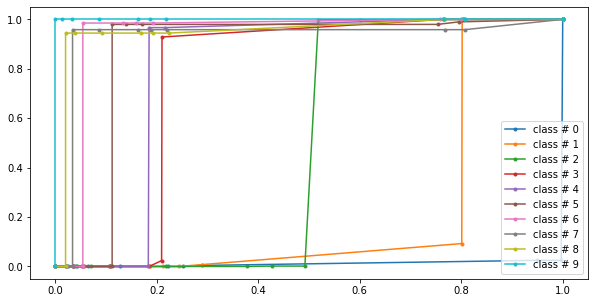

In [586]:
#ROC Model

y_pred1 = hdc.predict(X_test)
y_pred1=[np.argmax(i) for i in y_pred1]

plt.figure(figsize=(10,5))


for i in range(10):
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred1, pos_label=i)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras,marker='.'.format(), label='class # %0.f' % i)
    
plt.legend(loc="lower right")

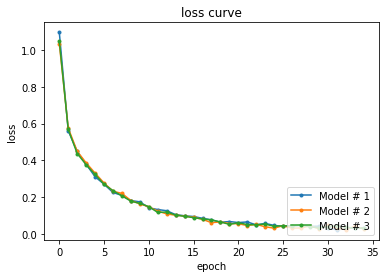

In [587]:
#loss curve


#plt.plot()
#plt.plot(history3.history['loss'])
plt.title('loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')

for i in range(3):

    if(i==0) :
             plt.plot(history1.history['loss'],marker='.'.format(), label='Model # %0.f' % 1)
    elif(i==1):
             plt.plot(history2.history['loss'],marker='.'.format(), label='Model # %0.f' % 2)
    else :
             plt.plot(history3.history['loss'],marker='.'.format(), label='Model # %0.f' % 3)
plt.legend(loc="lower right")


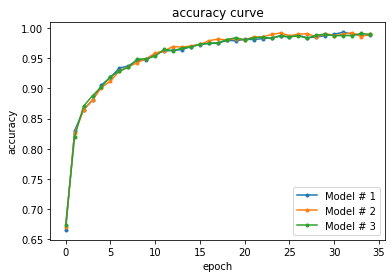

In [588]:
#Accuracy curve

import matplotlib.pyplot as plt
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')

for i in range(3):
    if(i==0) :
             plt.plot(history1.history['accuracy'],marker='.'.format(), label='Model # %0.f' % 1)
    elif(i==1):
             plt.plot(history2.history['accuracy'],marker='.'.format(), label='Model # %0.f' % 2)
    else :
             plt.plot(history3.history['accuracy'],marker='.'.format(), label='Model # %0.f' % 3)
plt.legend(loc="lower right")

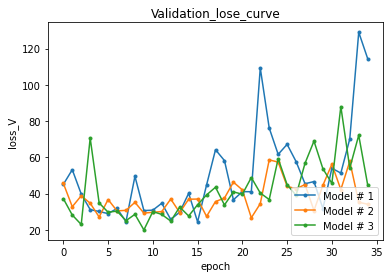

In [589]:
#Validation_Loss_curve

import matplotlib.pyplot as plt
plt.title('Validation_lose_curve')
plt.ylabel('loss_V')
plt.xlabel('epoch')

for i in range(3):
    if(i==0) :
             plt.plot(history1.history['val_loss'],marker='.'.format(), label='Model # %0.f' % 1)
    elif(i==1):
             plt.plot(history2.history['val_loss'],marker='.'.format(), label='Model # %0.f' % 2)
    else :
             plt.plot(history3.history['val_loss'],marker='.'.format(), label='Model # %0.f' % 3)
plt.legend(loc="lower right")

In [590]:
#Compare 3 models in training accuracy

print("\t\t\t CNN \t\t  DCNN   \t\t  HDC")
print(f"Tranning_Accuracy: {train_acc1} {train_acc2} {train_acc3}")

			 CNN 		  DCNN   		  HDC
Tranning_Accuracy: 0.9938454031944275 0.9965534210205078 0.9963072538375854


In [591]:
#Compare 3 models in testing accuracy

print("\t\t\t CNN \t\t  DCNN   \t\t  HDC")
print(f"Testing_Accuracy: {test_acc1} {test_acc2} {test_acc3}")

			 CNN 		  DCNN   		  HDC
Testing_Accuracy: 0.9543306827545166 0.9488189220428467 0.9716535210609436


In [592]:
#Compare 3 models in Required Time

print("\t\t CNN \t\t  DCNN   \t     HDC ")
print(f"Timing:  {time1} {time2} {time3}")

		 CNN 		  DCNN   	     HDC 
Timing:  201.97470712661743 206.64966583251953 349.05693340301514


CNN_BlockDigram

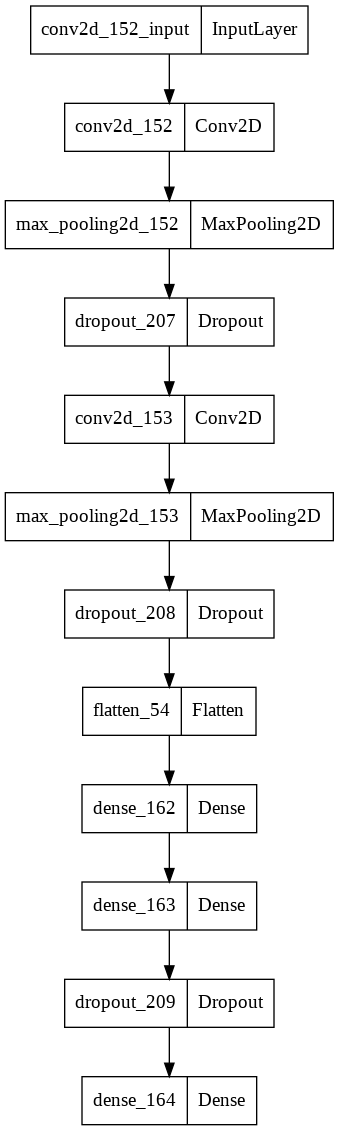

In [596]:
tf.keras.utils.plot_model(
    cnn,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

DNN_BlockDigram

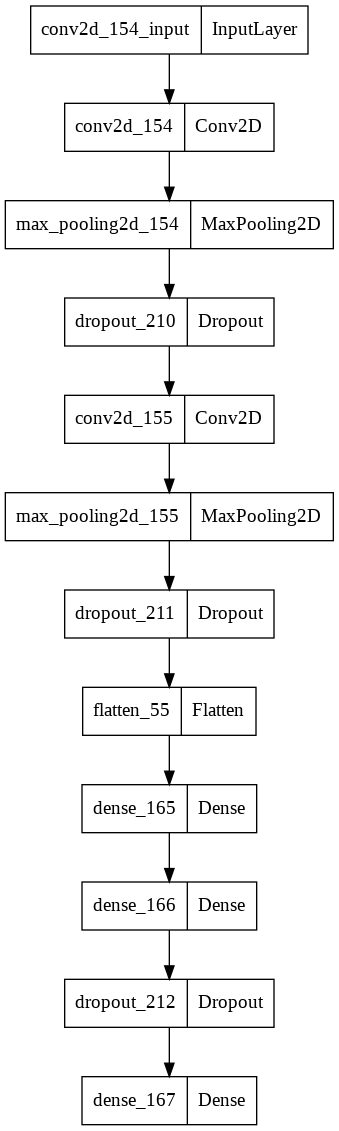

In [597]:
tf.keras.utils.plot_model(
    di,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

HDC_BlockDigram

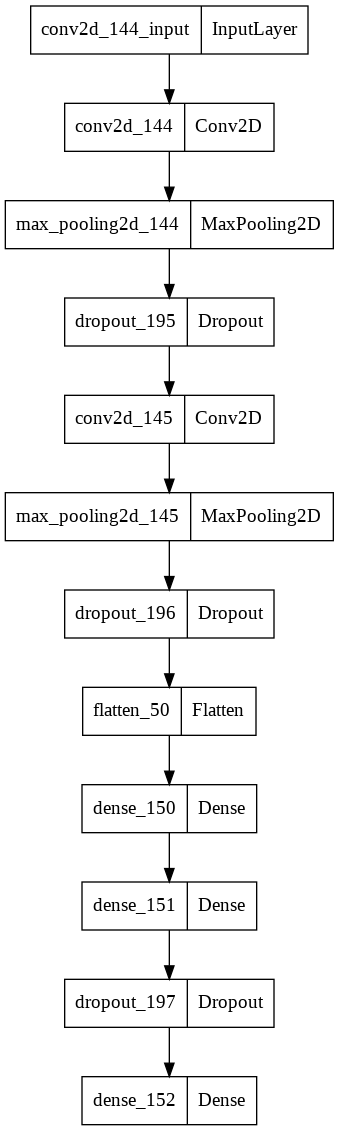

In [598]:
tf.keras.utils.plot_model(
    hdc,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)